### Student Information
Name: Elijah Albertson

Student ID: 112065421

GitHub ID: efalbert

Kaggle name: Elijah Albertson


---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

In [1]:
#Please Note: I removed the Googlenews data set from the lab2 directory due to issues when trying
#to push it to github. it kept failing due to the size of the dataset. 

In [125]:
import pandas as pd

### training data
anger_train = pd.read_csv("/Users/elijah.f.albertson/Desktop/DM2023-Lab2-Master/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("/Users/elijah.f.albertson/Desktop/DM2023-Lab2-Master/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("/Users/elijah.f.albertson/Desktop/DM2023-Lab2-Master/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("/Users/elijah.f.albertson/Desktop/DM2023-Lab2-Master/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [126]:
# Merge Data Set
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [127]:
# Test/ Preview Data Set

anger_test = pd.read_csv("/Users/elijah.f.albertson/Desktop/DM2023-Lab2-Master/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("/Users/elijah.f.albertson/Desktop/DM2023-Lab2-Master/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("/Users/elijah.f.albertson/Desktop/DM2023-Lab2-Master/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("/Users/elijah.f.albertson/Desktop/DM2023-Lab2-Master/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# Merge and preview all four Data Sets
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()


,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [128]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [129]:
train_df.head

<bound method NDFrame.head of          id                                               text  emotion  \
2791  30787  @debutemma I dont have to sit here and take th...      joy   
1545  20688  #Charlotte's #young &amp; #restless; I applaud...     fear   
2784  30780  People always tell me that they don't expect m...      joy   
271   10271    Like if you aggravate me constantly, byeeeeeeee    anger   
1885  21028  @PanicAtTheDisco hey, y'all announced it like ...     fear   
...     ...                                                ...      ...   
2170  30166  @lennyabrahamson May I send you a copy of #Her...      joy   
2859  40032  It's now September and we're still battling a ...  sadness   
567   10567  Projection is perception. See it in someone el...    anger   
121   10121  SOMEONE LET SNAKES IN MY HOUSE, I BET IT @Ya_B...    anger   
500   10500  @paulbushnell25 @EE bad news if ordered online...    anger   

      intensity  
2791      0.146  
1545      0.438  
2784      0.160

In [130]:
test_df.head

<bound method NDFrame.head of         id                                               text  emotion  \
43   10900  Kik to trade, have fun or a conversation  (kik...    anger   
264  30893  Tutoring gives me such an exhilarating feeling...      joy   
66   10923  Taking umbrage because Jimmy Carr claimed that...    anger   
8    10865  @huwellwell One chosen by the CLP members! MP ...    anger   
303  40816                @trashcami this cured my depression  sadness   
..     ...                                                ...      ...   
70   10927  Sting is just too damn earnest for early morni...    anger   
181  21244  Not the best horror ever but I like that the u...     fear   
115  21178  Okay. Brace yourself. I will attempt my first ...     fear   
247  30876  Dolores.' A thin lipped smile graced glossed l...      joy   
234  30863  @HunterDean_ [he gives a gleeful squeak and wr...      joy   

     intensity  
43       0.167  
264      0.896  
66       0.375  
8        0.68

In [131]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


In [132]:
train_df.head

<bound method NDFrame.head of          id                                               text  emotion  \
2791  30787  @debutemma I dont have to sit here and take th...      joy   
1545  20688  #Charlotte's #young &amp; #restless; I applaud...     fear   
2784  30780  People always tell me that they don't expect m...      joy   
271   10271    Like if you aggravate me constantly, byeeeeeeee    anger   
1885  21028  @PanicAtTheDisco hey, y'all announced it like ...     fear   
...     ...                                                ...      ...   
2170  30166  @lennyabrahamson May I send you a copy of #Her...      joy   
2859  40032  It's now September and we're still battling a ...  sadness   
567   10567  Projection is perception. See it in someone el...    anger   
121   10121  SOMEONE LET SNAKES IN MY HOUSE, I BET IT @Ya_B...    anger   
500   10500  @paulbushnell25 @EE bad news if ordered online...    anger   

      intensity  
2791      0.146  
1545      0.438  
2784      0.160

In [133]:
# EXERCISE ONE 

In [134]:
import pandas as pd
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer

# Create Count vectorizer for training dataset
count_vect_train = CountVectorizer()
X_train_counts = count_vect_train.fit_transform(train_df['text'])

# Get term frequencies
term_frequencies_train = X_train_counts.sum(axis=0).A1

# Create a DataFrame with terms and frequencies for training
train_terms_df = pd.DataFrame({
    'Term': count_vect_train.get_feature_names_out(),
    'Frequency': term_frequencies_train
})

# Sort the DataFrame by frequency in descending order
train_terms_df = train_terms_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Select the top 30 terms for training
top_train_terms_df = train_terms_df.head(30)

# Create a bar graph using Plotly for training
fig_train = px.bar(top_train_terms_df, x='Term', y='Frequency',
                   title='Top 30 Word Frequencies - Training Dataset',
                   labels={'Frequency': 'Word Frequency', 'Term': 'Words'},
                   width=1000, height=500)

# Update layout for better x-axis label visibility
fig_train.update_layout(xaxis=dict(tickangle=45))

# Show the plot for training
fig_train.show()


In [135]:
# Create Count vectorizer for testing dataset
count_vect_test = CountVectorizer()
X_test_counts = count_vect_test.fit_transform(test_df['text'])

# Get term frequencies
term_frequencies_test = X_test_counts.sum(axis=0).A1

# Create a DataFrame with terms and frequencies for testing
test_terms_df = pd.DataFrame({
    'Term': count_vect_test.get_feature_names_out(),
    'Frequency': term_frequencies_test
})

# Sort the DataFrame by frequency in descending order
test_terms_df = test_terms_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Select the top 30 terms for testing
top_test_terms_df = test_terms_df.head(30)

# Create a bar graph using Plotly for testing
fig_test = px.bar(top_test_terms_df, x='Term', y='Frequency',
                  title='Top 30 Word Frequencies - Testing Dataset',
                  labels={'Frequency': 'Word Frequency', 'Term': 'Words'},
                  width=1000, height=500)

# Update layout for better x-axis label visibility
fig_test.update_layout(xaxis=dict(tickangle=45))

# Show the plot for testing
fig_test.show()


In [136]:
#SAVE DATA AS PICKLE 

In [137]:
# Save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [138]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [139]:
# 1.3 EXPLORATORY DATA ANALYSIS (EDA)

In [140]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

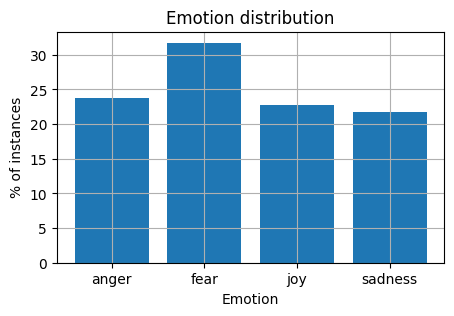

In [141]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

In [142]:
# FEATURE ENGINEERING (BOW)

In [143]:
# Import countvectorizer feature from sklearn libraries
from sklearn.feature_extraction.text import CountVectorizer

In [144]:
# Build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [145]:
 # 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [146]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [147]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [148]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [149]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [150]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

In [151]:
"😂" in feature_names


False

In [152]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [153]:
train_data_BOW_features_500.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 2, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [154]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [155]:
"😂" in feature_names_500

True

In [156]:
# EXERCISE TWO

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Build TF-IDF vectorizer with 1000 features
TFIDF_vectorizer = TfidfVectorizer(max_features=1000)

# Learn vocabulary for each data set (text)
train_data_TFIDF_features = TFIDF_vectorizer.fit_transform(train_df['text'])
test_data_TFIDF_features = TFIDF_vectorizer.transform(test_df['text'])

# Print features ranging from 100 to 110
feature_names_TFIDF = TFIDF_vectorizer.get_feature_names_out()
print("Feature names for features[100:110]:", feature_names_TFIDF[100:110])

Feature names for features[100:110]: ['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']


In [158]:
# 3. MODEL
# 3.1. DECISION TREES

In [159]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [160]:
# Build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

# Training!
DT_model = DT_model.fit(X_train, y_train)

## Predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'joy', 'anger', 'anger', 'sadness', 'joy', 'joy', 'fear',
       'sadness', 'fear'], dtype=object)

In [161]:
# 4. Results and Evaluation

In [162]:
# Accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.68


In [163]:
# Precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))


              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [164]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [165]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

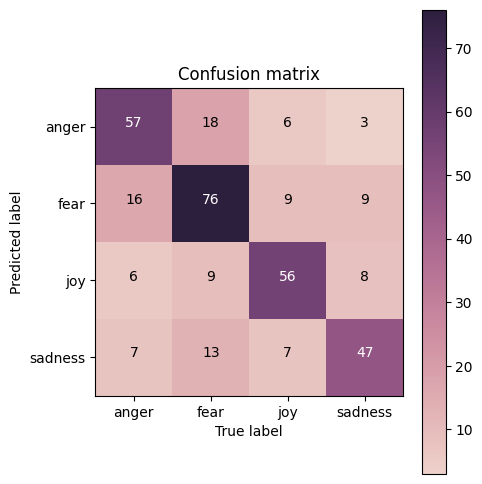

In [166]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

In [167]:
# EXERCISE 3

In [168]:
# Confusion matrices are used to evaluate the performance of a machine learning model. It is basically a tool to assess
# the model’s accuracy. It can be used on binary class databases and treats the results similar to a boolean form. That is 
# in a confusion matrix, categories can either be Positive or Negative. In the matrix above, each grid represents a negative 
# or positive value which can either be categorized as true positive(TP), true negative(TN), false positive (FP) or false 
# negative (FN). All the dark-coloured grids are TPs. True positive refers to all instances that are predicted as positive 
# which are actually positive. This means that the correct prediction for each emotion (class) is represented by the
# dark-coloured grids. (anger: 57, fear:76, joy: 56 and sadness: 47). Therefore the model can predict fear more accurately, 
# followed by anger, joy and sadness. To get the results in the classification report above we can reverse engineer this matrix.
# For example, Precision for anger = TP_Anger/(TP_Anger + FP_Anger) which is 57/(57+27) = 0.67

In [169]:
# EXERCISE FOUR

In [170]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics 

# Build Naive Bayes model
nb = MultinomialNB()

# Training the model
nb.fit(X_train, y_train)

# Predictions on training and testing sets
y_pred_train = nb.predict(X_train)
y_pred_test = nb.predict(X_test)

# Accuracy on training and testing sets
acc_train = metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train)
acc_test = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test)

# Print the results
print('Naive Bayes - Training Accuracy: {:.2f}'.format(acc_train))
print('Naive Bayes - Testing Accuracy: {:.2f}'.format(acc_test))

# Classification report for testing set
print('\nClassification Report (Testing Set):\n', classification_report(y_true=y_test, y_pred=y_pred_test))

# Print the confusion matrix for testing set 
print('\nConfusion Matrix (Testing Set):\n', confusion_matrix(y_true=y_test, y_pred=y_pred_test))


Naive Bayes - Training Accuracy: 0.79
Naive Bayes - Testing Accuracy: 0.70

Classification Report (Testing Set):
               precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347


Confusion Matrix (Testing Set):
 [[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


In [171]:
# EXERCISE FIVE 

# Both classification models provided very distinct results as they pertain to the accuracy of the training and testing data set.
# One can see that the decision tree achieved 99% accuracy in the training data set and 66% in the testing data set. On the other
# hand, Naive Bayes achieved 79% and 70%, respectively. Based on acquired knowledge, I am left to believe that the decision tree model 
# exhibits overfitting. This can be seen as the training data set accuracy is way higher than that of its testing data set accuracy.
# This suggests that the decision tree captured noise (outliers) and does not perform well with newly added data. On the other hand the 
# Naive Bayes results were not far apart for each data set which indicates that it works better with newly added data. 

# Overfitting: an undesirable machine learning behaviour that occurs when the machine learning model gives accurate 
# predictions for training data but not for new data. https://aws.amazon.com/what-is/overfitting/


In [172]:
# 6. DEEP LEARNING 

In [173]:
import keras

# Standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

# Check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [174]:
# 6.2 DEAL WITH CATEGORICAL LABEL (y)

In [175]:
# Deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2791      joy
1545     fear
2784      joy
271     anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [176]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [177]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# Input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# Output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# Create model
model = Model(inputs=[model_input], outputs=[model_output])

# Loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                32064     
                                                                 
 re_lu_2 (ReLU)              (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_3 (ReLU)              (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
 softmax_1 (Softmax)         (None, 4)                 0   

In [178]:
# 6.4 TRAIN

In [179]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('/Users/elijah.f.albertson/Desktop/DM2023-Lab2-Master/logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 0s 1ms/step - loss: 1.3341 - accuracy: 0.3695 - val_loss: 1.2895 - val_accuracy: 0.4380
Epoch 2/25
113/113 [==============================] - 0s 633us/step - loss: 1.0029 - accuracy: 0.6316 - val_loss: 0.9235 - val_accuracy: 0.6628
Epoch 3/25
113/113 [==============================] - 0s 651us/step - loss: 0.5843 - accuracy: 0.7944 - val_loss: 0.7941 - val_accuracy: 0.6974
Epoch 4/25
113/113 [==============================] - 0s 617us/step - loss: 0.4267 - accuracy: 0.8453 - val_loss: 0.7489 - val_accuracy: 0.7003
Epoch 5/25
113/113 [==============================] - 0s 647us/step - loss: 0.3332 - accuracy: 0.8774 - val_loss: 0.8175 - val_accuracy: 0.6916
Epoch 6/25
113/113 [==============================] - 0s 632us/step - loss: 0.2722 - accuracy: 0.9109 - val_loss: 0.8554 - val_accuracy: 0.6916
Epoch 7/25
113/113 [==============================] - 0s 632us/step - loss: 0.2266 - accuracy: 0.9222 - val_loss: 0.9288 - val_accuracy: 0

In [180]:
# 6.5  PREDICT ON TESTING DATA

In [181]:
# Predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 868us/step


array([[8.0262494e-01, 1.8518272e-01, 9.1725420e-03, 3.0197799e-03],
       [1.2185679e-02, 4.6029780e-03, 9.8304290e-01, 1.6838624e-04],
       [3.5840984e-02, 2.3534700e-02, 9.3976086e-01, 8.6350535e-04],
       [9.9999940e-01, 2.0453241e-08, 2.9323393e-09, 6.4514148e-07],
       [6.2397204e-04, 3.3948235e-03, 3.1865802e-05, 9.9594939e-01]],
      dtype=float32)

In [182]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'joy', 'joy', 'anger', 'sadness'], dtype=object)

In [183]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [184]:
# Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("/Users/elijah.f.albertson/Desktop/DM2023-Lab2-Master/logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.369499,1.334136,0.438040,1.289466
1,1,0.631608,1.002870,0.662824,0.923452
2,2,0.794354,0.584326,0.697406,0.794136
3,3,0.845281,0.426681,0.700288,0.748872
4,4,0.877387,0.333174,0.691643,0.817468
5,5,0.910877,0.272152,0.691643,0.855412
6,6,0.922225,0.226605,0.651297,0.928795
7,7,0.936618,0.193923,0.688761,0.949029
8,8,0.949903,0.168810,0.694524,0.976616
9,9,0.951564,0.144767,0.680115,1.009983


In [185]:
# EXERCISE SIX

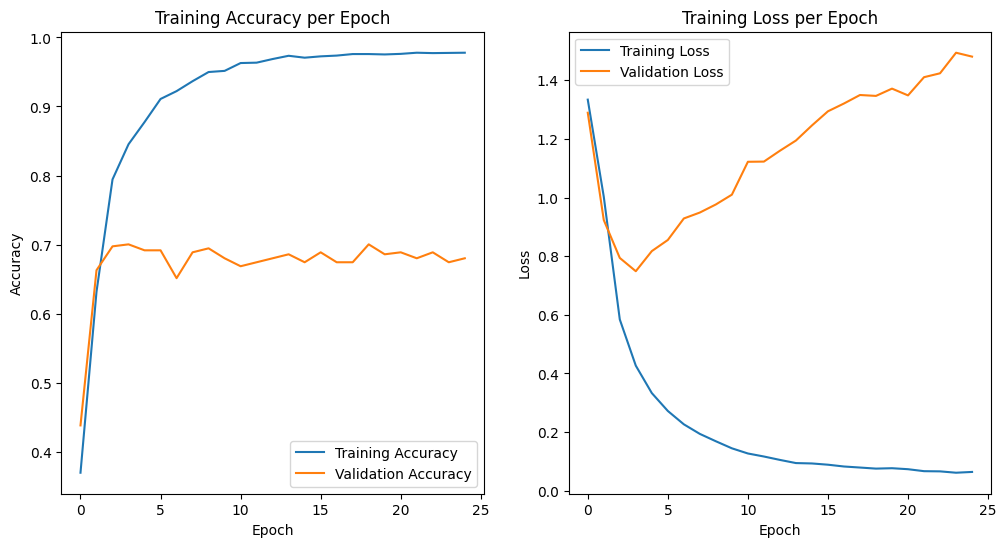

In [186]:
import matplotlib.pyplot as plt

# Load the training log
training_log = pd.read_csv("/Users/elijah.f.albertson/Desktop/DM2023-Lab2-Master/logs/training_log.csv")

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_log['epoch'], training_log['accuracy'], label='Training Accuracy')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_log['epoch'], training_log['loss'], label='Training Loss')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Validation Loss')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show plot
plt.show()


In [187]:
# EXERCISE SIX EXPLANATION

# THe graphs above show the training accuracy per Epoch. In machine learning, an epoch simply means a complete run/ pass
# through the entire data set during the training phase. The graphs essentially show possible overfitting or underfitting
# issues in the model. Ideally, for a model to be considered as "optimal", there are two things we want. Firstly, we want both
# the training and validation accuracy to increase and secondly, both the validation and accuracy loss to decrease.  If the
# training accuracy is high, but the validation accuracy is low, the model is overfitting to the training If both training and
# validation accuracy are low, the model may be underfitting.  Hence, we can assume that in both training models, there are
# signs of overfitting.

In [188]:
# 7. Word2Vector

In [189]:
# 7.1 Prepare training corpus



In [190]:
# Check library
import gensim

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# If you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# The input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2791,30787,@debutemma I dont have to sit here and take th...,"[@, debutemma, I, dont, have, to, sit, here, a..."
1545,20688,#Charlotte's #young &amp; #restless; I applaud...,"[#, Charlotte, 's, #, young, &, amp, ;, #, res..."
2784,30780,People always tell me that they don't expect m...,"[People, always, tell, me, that, they, do, n't..."
271,10271,"Like if you aggravate me constantly, byeeeeeeee","[Like, if, you, aggravate, me, constantly, ,, ..."
1885,21028,"@PanicAtTheDisco hey, y'all announced it like ...","[@, PanicAtTheDisco, hey, ,, y'all, announced,..."


In [191]:
# Create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'debutemma', 'I', 'dont', 'have', 'to', 'sit', 'here', 'and', 'take', 'this', 'from', 'u', 'spry', 'young', 'children']),
       list(['#', 'Charlotte', "'s", '#', 'young', '&', 'amp', ';', '#', 'restless', ';', 'I', 'applaud', 'ur', 'fire', 'bt', 'always', 'b', 'respectful', 'of', 'authority', ',', 'police', ',', 'elders', ',', 'parents', '.', 'Violence', ',', 'not', 'the', 'way', '🙏🏽✌🏽️']),
       list(['People', 'always', 'tell', 'me', 'that', 'they', 'do', "n't", 'expect', 'me', 'to', 'have', 'anxiety', 'because', 'I', "'m", 'generally', 'cheerful', 'and', 'do', "n't", 'act', 'the', 'way', 'they', 'expect', 'me', 'to', '.'])],
      dtype=object)

In [192]:
# 7.2 Training our mode

In [193]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

In [194]:
# 7.3 Generating word vector (embeddings)

In [195]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.7751076 ,  0.09992948,  0.26370192,  0.09126185, -0.43107855,
       -1.1034545 ,  0.5890133 ,  0.8709042 , -0.5810468 , -0.84069085,
       -0.1960644 , -0.92470515, -0.45006233,  0.7186194 , -0.27310628,
       -0.5672991 ,  0.5520804 , -0.289983  ,  0.26165694, -1.1781923 ,
        0.40507692,  0.9984101 ,  0.46303684, -0.00745489,  0.10637122,
        0.31401938, -0.44300157,  0.7194112 ,  0.06135236,  0.0611942 ,
        0.30725852, -0.16931963,  0.43649808, -0.9825831 , -0.47312206,
        0.24139366,  0.66311854, -0.2531135 , -0.5184063 , -0.77770203,
        0.24744394,  0.01494949, -0.3718043 ,  0.4848542 ,  0.5339093 ,
       -0.14643683, -0.87814295, -0.01418275,  0.45563847,  0.3405893 ,
        0.08110487, -0.26248688,  0.2728419 , -0.3380788 , -0.28414896,
       -0.54691154,  0.06759019, -0.19790114, -0.3637596 ,  0.42868918,
       -0.4264513 , -0.0291441 ,  0.48741695,  0.10167836, -0.67323124,
        0.8001857 ,  0.0884807 ,  0.6460576 , -1.7333846 ,  0.47

In [196]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('birthday', 0.916545569896698),
 ('Be', 0.9127541780471802),
 ('free', 0.9113150238990784),
 ('bday', 0.90959233045578),
 ('fanfiction', 0.9093786478042603),
 ('.\\nA', 0.9011279940605164),
 ('dad', 0.8961065411567688),
 ('Really', 0.8959181904792786),
 ('plz', 0.8936819434165955),
 ('help', 0.892997145652771)]

In [197]:
## Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('birthday', 0.916545569896698),
 ('Be', 0.9127541780471802),
 ('free', 0.9113150238990784),
 ('bday', 0.90959233045578),
 ('fanfiction', 0.9093786478042603),
 ('.\\nA', 0.9011279940605164),
 ('dad', 0.8961065411567688),
 ('Really', 0.8959181904792786),
 ('plz', 0.8936819434165955),
 ('help', 0.892997145652771)]

In [198]:
from gensim.models import KeyedVectors

# Import Data Set
model_path = "/Users/elijah.f.albertson/Desktop/DM2023-Lab2-Master/data/semeval/GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [199]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.9336148500442505),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158350825309753),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248763084412),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

In [200]:
# 7.5 king + woman - man = ?

In [201]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

In [202]:
# EXERCISE SEVEN

In [203]:
def get_mean_vector(word2vec_model, words):
    # remove out-of-vocabulary words
    words = [word for word in words if word in word2vec_model.wv.key_to_index]
    if len(words) >= 1:
        vectors = [word2vec_model.wv.get_vector(word) for word in words]
        return np.mean(vectors, axis=0)
    else:
        return []


In [204]:
# Example words
words = ['happy', 'joy', 'sadness']

# Print the mean vector 
print("Mean Vector:", get_mean_vector(word2vec_model, words))

Mean Vector: [ 0.19845629  0.17987911  0.01790186  0.10594222 -0.08517494 -0.6276394
  0.23475419  0.8686088  -0.45325518 -0.4587518  -0.04742458 -0.46800983
 -0.0721288   0.44148687  0.02836145 -0.3852253   0.41367182 -0.41665447
  0.11416164 -0.9248917   0.314692    0.41527393  0.43066517 -0.24923499
  0.04788476 -0.04233161 -0.2847379   0.3202062  -0.16126604  0.05787278
  0.41811943 -0.13203745  0.27099013 -0.6159989  -0.33524272  0.20578253
  0.32451198 -0.18840544 -0.24756937 -0.5851194   0.04988386  0.04256859
 -0.34584752  0.09021416  0.13290145 -0.19030185 -0.34625188 -0.0534622
  0.21623361  0.37064114  0.16444649 -0.2834187  -0.04497301 -0.21198596
 -0.06692559 -0.16472934  0.14879362 -0.12355802 -0.46340778  0.24900313
 -0.24656685 -0.05995306  0.29650387  0.00661928 -0.49034753  0.56351674
  0.09525879  0.491208   -1.0728577   0.37239447  0.07455168  0.48141503
  0.5630294  -0.12079094  0.46197733 -0.16919549  0.26340666 -0.11096289
 -0.31555972 -0.12886168 -0.3921255  -0.

In [205]:
# EXERCISE SEVEN contd..
# One method we can use to represent sentence data in word vectors, is by calculating the mean vector of all the word vectors 
# in the sentence. This mean vector serves as a marker of placeholder for that the entire sentence. The get_mean_vector 
# takes a Word2Vec model as input and returns the mean vector. Doing this allows me to utilize pre-trained word vectors 
# to represent sentences and train models. Like count vectorizor, the words are represented in a numeric form. 

In [206]:
# 8. CLUSTERING: K-MEANS

In [207]:
# Clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# Convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [208]:
from sklearn.cluster import KMeans

# We have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# Cluster result
cluster_result = kmeans_model.labels_

# Show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))


word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


In [209]:
# Check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [210]:
# Check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [211]:
# 9. HIGH-DIMENSION VISUALIZATION: T-SNE
# 9.1 PREPARE VISUALIZING TARGET

In [212]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


In [213]:
# 9.2 PLOT USING T-SNE (2-DIMENSION)

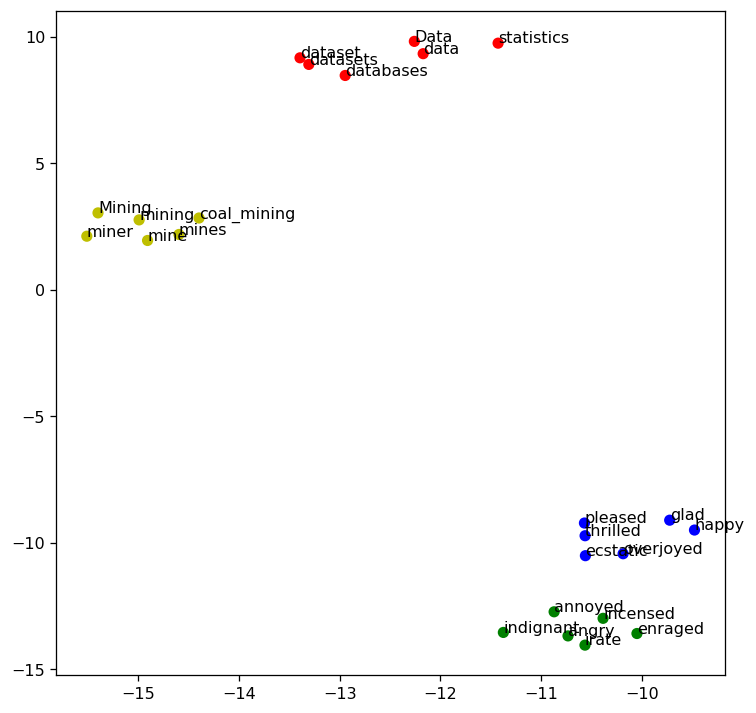

In [214]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

In [215]:
# EXERCISE 8

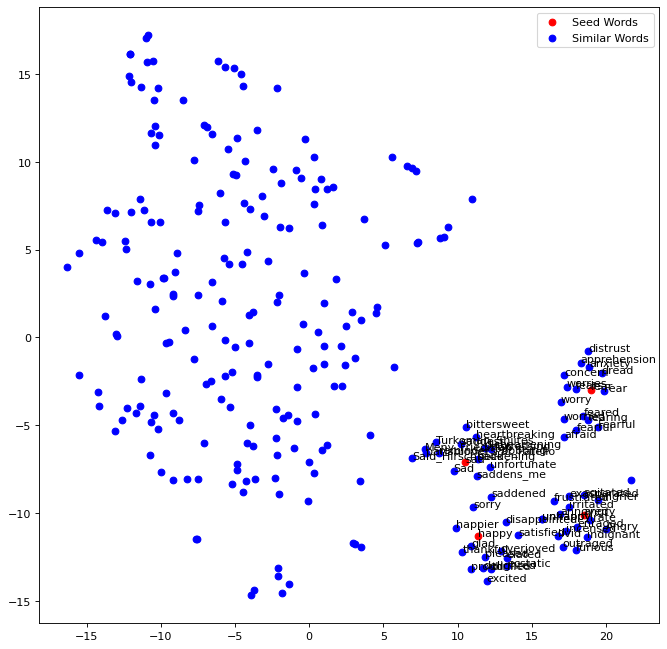

In [216]:
# t-SNE visualization

%matplotlib inline
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Prepare data for t-SNE visualization
core_words = ['angry', 'happy', 'sad', 'fear']
similar_words = [word for seed in core_words for word, _ in w2v_google_model.most_similar(seed, topn=15)]

target_words_tsne = core_words + similar_words
color_tsne = ['r'] * len(core_words) + ['b'] * len(similar_words)

# Prepare training word vectors
size = 200
all_word = list(w2v_google_model.index_to_key)
word_train_tsne = target_words_tsne + all_word[:size]
X_train_tsne = w2v_google_model[word_train_tsne]

# t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

# Training
X_tsne_tsne = tsne.fit_transform(X_train_tsne)

# Plot the result
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(X_tsne_tsne[:len(core_words), 0], X_tsne_tsne[:len(core_words), 1], c='r', label='Seed Words')
plt.scatter(X_tsne_tsne[len(core_words):, 0], X_tsne_tsne[len(core_words):, 1], c='b', label='Similar Words')
for label, x, y in zip(target_words_tsne, X_tsne_tsne[:, 0], X_tsne_tsne[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.legend()
plt.show()


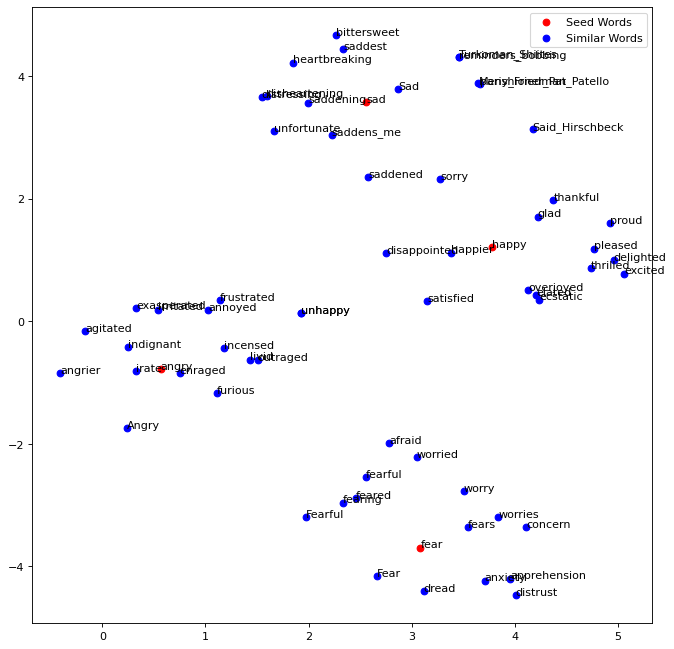

In [217]:
# EXERCISE 8 (after having done slight adjustments)

# t-SNE visualization
%matplotlib inline
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Prepare data for t-SNE visualization
core_words = ['angry', 'happy', 'sad', 'fear']
similar_words = [word for seed in core_words for word, _ in w2v_google_model.most_similar(seed, topn=15)]

target_words_tsne = core_words + similar_words
color_tsne = ['r'] * len(core_words) + ['b'] * len(similar_words)

# Prepare training word vectors after removing all_word list so that the plot would focus on the training model words and corresponding similar words
word_train_tsne = target_words_tsne
X_train_tsne = w2v_google_model[word_train_tsne]

# t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

# Training
X_tsne_tsne = tsne.fit_transform(X_train_tsne)

# Plot the result
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(X_tsne_tsne[:len(core_words), 0], X_tsne_tsne[:len(core_words), 1], c='r', label='Seed Words')
plt.scatter(X_tsne_tsne[len(core_words):, 0], X_tsne_tsne[len(core_words):, 1], c='b', label='Similar Words')
for label, x, y in zip(target_words_tsne, X_tsne_tsne[:, 0], X_tsne_tsne[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.legend()
plt.show()
